# IPython's Rich Display System

In Python, objects can declare their textual representation using the `__repr__` method.  IPython expands on this idea and allows objects to declare other, richer representations including:

* HTML
* JSON
* PNG
* JPEG
* SVG
* LaTeX

A single object can declare some or all of these representations; all are handled by IPython's *display system*. This Notebook shows how you can use this display system to incorporate a broad range of content into your Notebooks.

## Basic display imports

The `display` function is a general purpose tool for displaying different representations of objects. Think of it as `print` for these rich representations.

In [ ]:
from IPython.display import display

A few points:

* Calling `display` on an object will send **all** possible representations to the Notebook.
* These representations are stored in the Notebook document.
* In general the Notebook will use the richest available representation.

If you want to display a particular representation, there are specific functions for that:

In [ ]:
from IPython.display import display_pretty, display_html, display_jpeg, display_png, display_json, display_latex, display_svg

## Images

To work with images (JPEG, PNG) use the `Image` class.

In [ ]:
from IPython.display import Image

In [ ]:
i = Image(filename='files/logo.png')

Returning an `Image` object from an expression will automatically display it:

In [ ]:
i

Or you can pass it to `display`:

In [ ]:
display(i)

An image can also be displayed from raw data or a url

In [ ]:
Image(url='http://python.org/images/python-logo.gif')

SVG images are also supported out of the box (since modern browsers do a good job of rendering them):

In [ ]:
from IPython.display import SVG
SVG(filename='files/python-logo.svg')

## Links to local files

If we want to create a link to one of them, we can call use the `FileLink` object.

In [1]:
from IPython.display import FileLink, FileLinks
FileLink('01 - Markdown Cells.ipynb')

C:\Users\grzeg\Stacja\00_Jupyter\01 - Markdown Cells.ipynb

Alternatively, if we want to link to all of the files in a directory, we can use the `FileLinks` object, passing `'.'` to indicate that we want links generated for the current working directory. Note that if there were other directories under the current directory, `FileLinks` would work in a recursive manner creating links to files in all sub-directories as well.

In [ ]:
FileLinks('.')

### Embedded vs Non-embedded Images

By default, image data is embedded in the Notebook document so that the images can be viewed offline. However it is also possible to tell the `Image` class to only store a *link* to the image. Let's see how this works using a webcam at Berkeley.

In [1]:
from IPython.display import Image

# by default Image data are embedded
Embed      = Image('http://www.kopernik.org.pl/uploads/camera/kamera-kolejka.jpg')

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url='http://www.kopernik.org.pl/uploads/camera/kamera-kolejka.jpg')

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url='http://scienceview.berkeley.edu/view/images/newview.jpg', embed=True)

Here is the embedded version. Note that this image was pulled from the webcam when this code cell was originally run and stored in the Notebook. Unless we rerun this cell, this is not todays image.

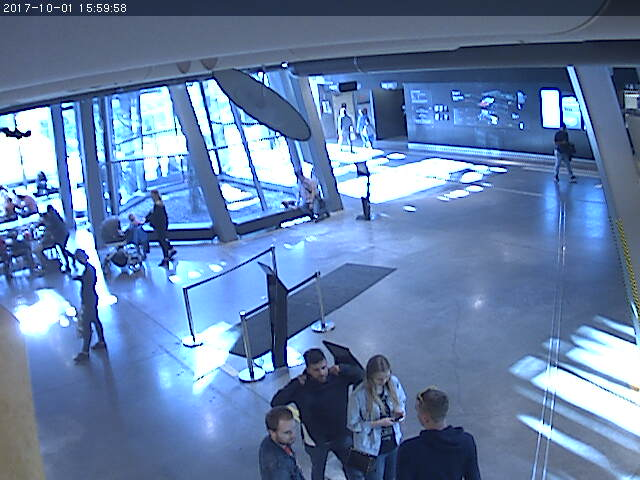

In [2]:
Embed

Here is today's image from same webcam at Berkeley, (refreshed every minutes, if you reload the notebook), visible only with an active internet connection, that should be different from the previous one. Notebooks saved with this kind of image will be lighter and always reflect the current version of the source, but the image won't display offline.

In [3]:
SoftLinked

Of course, if you re-run this Notebook, the two images will be the same again.

## Video

More exotic objects can also be displayed, as long as their representation supports the IPython display protocol.  For example, videos hosted externally on YouTube are easy to load (and writing a similar wrapper for other hosted content is trivial):

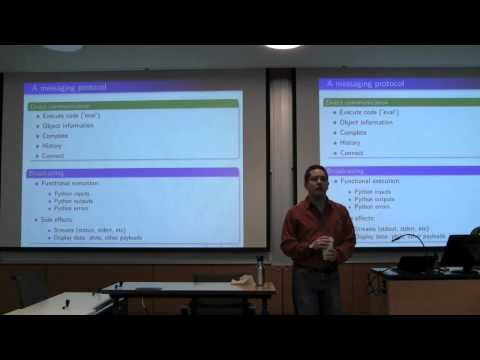

In [5]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')

Using the nascent video capabilities of modern browsers, you may also be able to display local
videos.  At the moment this doesn't work very well in all browsers, so it may or may not work for you;
we will continue testing this and looking for ways to make it more robust.  

The following cell loads a local file called  `animation.m4v`, encodes the raw video as base64 for http
transport, and uses the HTML5 video tag to load it. On Chrome 15 it works correctly, displaying a control
bar at the bottom with a play/pause button and a location slider.

In [ ]:
from IPython.display import HTML
from base64 import b64encode
video = open("animation.m4v", "rb").read()
video_encoded = b64encode(video)
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

## HTML

Python objects can declare HTML representations that will be displayed in the Notebook. If you have some HTML you want to display, simply use the `HTML` class.

In [ ]:
from IPython.display import HTML

In [ ]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

In [ ]:
h = HTML(s); h

Pandas makes use of this capability to allow `DataFrames` to be represented as HTML tables.

In [8]:
import pandas

By default, `DataFrames` will be represented as text; to enable HTML representations we need to set a print option:

In [ ]:
pandas.core.format.set_printoptions(notebook_repr_html=True)

Here is a small amount of stock data for APPL:

In [6]:
%%file data17.csv
Date,Open,High,Low,Close,Volume,Adj Close
2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53

Writing data17.csv


Read this as into a `DataFrame`:

In [9]:
df = pandas.read_csv('data17.csv')

And view the HTML representation:

In [10]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
1,2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2,2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
3,2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
4,2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
5,2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53


## External sites

You can even embed an entire page from another site in an iframe; for example this is today's Wikipedia
page for mobile users:

In [ ]:
from IPython.display import HTML
HTML('<iframe src=http://sommarskog.se width=700 height=350></iframe>')

## LaTeX

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered
in the browser thanks to the [MathJax library](http://mathjax.org).

In [ ]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

With the `Latex` class, you have to include the delimiters yourself.  This allows you to use other LaTeX modes such as `eqnarray`:

In [ ]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

Or you can enter latex directly with the `%%latex` cell magic:

In [ ]:
%%latex
\begin{aligned}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{aligned}